In [1]:
import pandas as pd
basketball = pd.read_csv('https://raw.githubusercontent.com/evapanizo/IronHack-Data-Module-2/master/27.-Network-Analysis/data/us_mens_basketball.csv', sep=',')

In [19]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [3]:
# pip install networkx
import networkx as nx
# pip install python-louvin
import community
import pandas as pd

# 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

In [23]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [48]:
def df_to_graph(df, entity, edge):
    ''' Transform a dataframe into another dataframe suitable to work with graphs.'''
    graph_df = pd.merge(df, df, how='inner', on=edge)
    graph_df = graph_df.groupby([f'{entity}_x', f'{entity}_y']).count().reset_index()
    graph_df = graph_df.query(f'{entity}_x != {entity}_y')

    if type(edge) == list:
        graph_df = graph_df.loc[:, [entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df.loc[:, [entity + '_x', entity + '_y', edge]]
    
    return graph_df.rename(columns={f'{entity}_x':f'{entity}_src', 
                                    f'{entity}_y':f'{entity}_dest'})

graph_df = df_to_graph(basketball, 'Name', 'Games')
graph_df.sort_values('Games', ascending=False).head()

,Name_src,Name_dest,Games
1557,LeBron Raymone James,Carmelo Kyan Anthony,3
282,Carmelo Kyan Anthony,LeBron Raymone James,3
1347,Karl Malone,Charles Wade Barkley,2
1487,Kobe Bean Bryant,LeBron Raymone James,2
429,"Christopher Paul ""Chris"" Mullin",Michael Jeffrey Jordan,2


# 2. Use the from_pandas_edgelist method to turn the data frame into a graph.

In [5]:
G = nx.from_pandas_edgelist(graph_df, 'Name_x', 'Name_y')

# 3. Compute and print the following graph statistics for the graph:¶


* Number of nodes
* Number of edges
* Average degree
* Density

In [6]:
print('Number of edges:', G.size())
print('Average degree:', sum(dict(G.degree()).values())/G.order())
print('Density:', nx.density(G))

Number of edges: 1232
Average degree: 12.571428571428571
Density: 0.06446886446886448


# 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [50]:
betweenness = nx.betweenness_centrality(G, weight='edge')
betweenness = pd.DataFrame.from_dict(betweenness, orient='index').reset_index()
betweenness.columns = ['Node', 'Betweenness Centrality']
betweenness.sort_values('Betweenness Centrality', ascending=False).head()

,Node,Betweenness Centrality
41,Gary Dwayne Payton,0.091938
42,Jason Frederick Kidd,0.091356
53,Carmelo Kyan Anthony,0.047423
86,David Maurice Robinson,0.032662
119,"William Marion ""Bill"" Hougland",0.030241


# 5. Compute PageRank centrality for the graph and print the top 5 nodes with the highest centrality.

In [53]:
pagerank = nx.pagerank(G)
pagerank = pd.DataFrame.from_dict(pagerank, orient='index').reset_index()
pagerank.columns = ['Node', 'PageRank Centrality']
pagerank.sort_values('PageRank Centrality', ascending=False).head()

,Node,PageRank Centrality
53,Carmelo Kyan Anthony,0.012578
86,David Maurice Robinson,0.009965
33,"Robert Albert ""Bob"" Kurland",0.009114
57,LeBron Raymone James,0.009085
119,"William Marion ""Bill"" Hougland",0.008851


# 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.¶


In [51]:
degree = nx.degree_centrality(G)
degree = pd.DataFrame.from_dict(degree, orient='index').reset_index()
degree.columns = ['Node', 'Degree Centrality']
degree.sort_values('Degree Centrality', ascending=False).head()

,Node,Degree Centrality
53,Carmelo Kyan Anthony,0.184615
86,David Maurice Robinson,0.143590
33,"Robert Albert ""Bob"" Kurland",0.133333
57,LeBron Raymone James,0.133333
119,"William Marion ""Bill"" Hougland",0.123077


# 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

Look for nx.draw_kamada_kawai for reference. Use the node_color = 'cyan' argument.

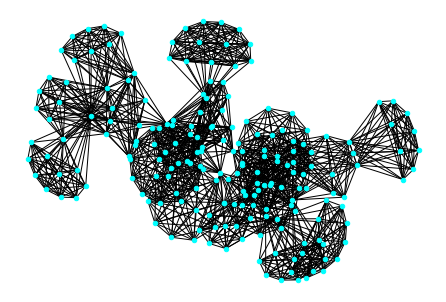

In [10]:
nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')


# 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

nx.ego_graph will help you visualize a graph centered at some node.

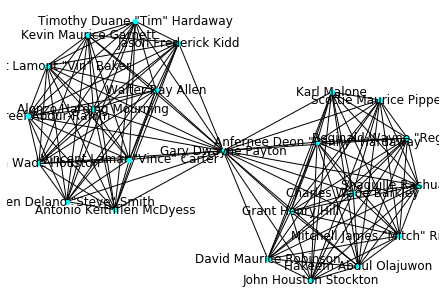

In [52]:
ego = nx.ego_graph(G, 'Gary Dwayne Payton', radius=1)
nx.draw_kamada_kawai(ego, node_size=20, node_color='cyan', with_labels=True)

# 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.


In [59]:
parts = community.best_partition(G)
values = list(parts.values())

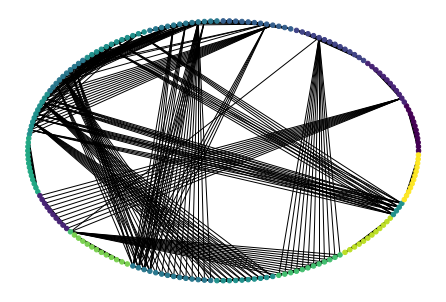

In [65]:
nx.draw_shell(G, node_size=20, node_color=values)

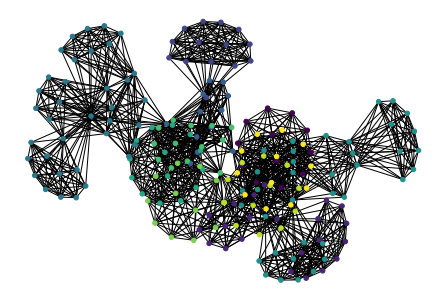

In [66]:
nx.draw_kamada_kawai(G, node_size=20, node_color=values)

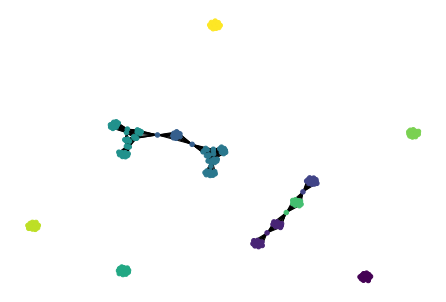

In [60]:
parts = community.best_partition(G)
values = list(parts.values())
nx.draw(G, node_size=20, node_color=values)